# The Surrogate Index: Combining Short-Term Proxies to Estimate Long-Term Treatment Effects More Rapidly and Precisely

[Reference](https://opportunityinsights.org/wp-content/uploads/2019/11/surrogate_paper.pdf)

[Reference code](https://github.com/OpportunityInsights/Surrogates-Replication-Code)

## Setup

Consider a setting with two samples: an Experimental ($E$) sample and an Observational ($O$)
sample. The experimental and observational sample contain observations on $N_E$ and $N_O$ units,
respectively. It is convenient to view the data as consisting of a single sample of size $N =
N_E + N_O$, with $P_i \isin \mathrm{O, E}$ a binary indicator for the group to which unit $i$ belongs.

For the $N_E$ individuals in the experimental group, there is a single binary treatment of
interest, $Wi \isin \{0, 1\}$, and a primary outcome, denoted by $Y_i$. This outcome is not observed
for individuals in the experimental sample. However, we do measure intermediate outcomes,
which we refer to as surrogates (to be defined precisely in Section 3.2), denoted by $S_i$ for each
individual. Typically, the surrogate outcomes are vector-valued in order to make the properties
we define plausible. Finally, we measure pre-treatment covariates $X_i$ for each individual. These
variables are known not to be affected by the treatment.

Following the potential outcomes framework or Rubin Causal Model (Rubin 1974; Holland
1986; Imbens and Rubin 2015), individuals in this group have two pairs of potential outcomes:
$\left(Y_i(0), Y_i(1)\right)$ and $\left(S_i(0), S_i(1)\right)$. The realized outcomes are related to their respective potential outcomes as follows.


$$
Y_i=\left\{\begin{array}{ll}Y_i(0) & \text { if } W_i=0, \\ Y_i(1) & \text { if } W_i=1,\end{array} \quad\right. \quad \text{and } 
S_i = \left\{
\begin{array}{ll}S_i(0) & \text { if } W_i=0, \\ S_i(1) & \text { if } W_i=1,\end{array}
\right .
$$

Overall, the units are characterized by the values of the sextuple $\left(Y_i(0), Y_i(1), S_i(0), S_i(1), X_i, W_i\right)$.
We do not observe the full sextuple for any units. Rather, for units in the experimental sample
we observe only the triple $\left(X_i, W_i, S_i\right)$ with support $\mathbb X, \mathbb W = \{0, 1\}$, and $\mathbb S$ respectively. In the
observational sample, we do not observe to which treatment the NO individuals were assigned.
We observe the triple $(X_i, S_i, Y_i)$, with support $\mathbb X, \mathbb S$, and $\mathbb Y$ respectively.

We are interested in the average effect of the treatment on the primary outcome in the
population from which the experimental sample is drawn:

$$
\tau  = \mathbb{E}[
    y_i(1) - Y_i(0) | P_i = E
]
$$


or similar estimands, such as the average primary outcome for the treated units, or for some other
subpopulation. For ease of exposition, we focus on estimating the ATE $\tau$ here. The fundamental
problem in estimating $\tau$ in the experimental group is that the outcome $Y_i$ is missing for all units in the experimental sample. To address this missing data problem, we exploit the observational
sample and its link to the experimental sample through the presence of the surrogate outcomes
$S_i$. Note that the surrogates, like the pre-treatment variables, are not of intrinsic interest. The
average causal effect of the treatment on the surrogates, $\tau_S = E[S_i(1) − S_i(0)|P_i = \mathrm E]$, is of
interest only insofar as it aids in estimation of $\tau$.

## Identification

In this section, we discuss three assumptions that together allow us to combine the observational
and experimental samples and estimate the causal effect of the treatment on the primary outcome
using a set of intermediate outcomes. The first assumption is unconfoundedness or ignorability,
common in the program evaluation literature, which ensures that adjusting for pre-treatment
variables leads to valid causal effects. The second assumption is the surrogacy condition, which
we define more precisely below, and is the key condition that allows to use the surrogate variables
to proxy for the primary outcome. The third assumption is comparability, which ensures that
we can learn about relationships in the experimental sample from the observational sample.
After stating these three assumptions, we present our main identification result, showing how
the ATE on the primary outcome can be identified by combining intermediate outcomes under
these assumptions.

### Unconfoundedness 

For the individuals in the experimental group, define the propensity score as the conditional
probability of receiving the treatment: $e(x) = \mathrm{pr}\left(Wi = 1 | X_i = x, P_i = E\right)$. We assume that for individuals in the experimental group, treatment assignment is unconfounded and we have overlap in the distribution of pre-treatment variables between the treatment and control groups (Rosenbaum and Rubin 1983).



**Assumption 1.** (Unconfounded Treatment Assignment / Strong Ignorability)

$(i)\quad W_i \perp\left(Y_i(0), Y_i(1), S_i(0), S_i(1)\right) \mid X_i, P_i=\mathrm{E}$

$(ii) \quad 0<e(x)<1$ for all $x \in \mathbb{X}$.

This assumption implies that in the experimental group, we could estimate the average causal
effect of the treatment on the outcome $Y_i$ by adjusting for pre-treatment variables, if the $Y_i$ were measured.

###  Surrogacy and the Surrogate Index

Because the primary outcome is not measured in the experimental group, we exploit surrogates
to identify the treatment effect of $W$ on $Y$ . The defining property of these surrogates $S_i$ is the following condition


**Assumption 2** (Surrogacy)

$$
W_i \perp Y_i \mid S_i, X_i, P_i = \mathrm E.
$$

Intuitively, the surrogacy condition requires that the surrogates fully capture the causal
link between the treatment and the primary outcome. Figure 1 illustrates the content of this
assumption using directed acyclical graphs to represent the causal chain from the treatment to
the surrogate to the long-term outcome, as in Pearl (1995). Panel A shows a DAG where the
surrogacy assumption is satisfied by a single intermediate outcome $S$ that lies on the causal
chain between $W$ and $Y$ . Panel B shows an example where Assumption 2 is violated because
there is a direct effect of the treatment on the outcome that does not pass through the surrogate.


Panel $C$ shows our approach to addressing this problem: introducing multiple intermediate
outcomes that together span the causal chain from $W$ to $Y$ . In this example, the three inter-
mediate outcomes together span the causal chain from $W$ to $Y$ and hence can be combined to
construct a surrogate index that captures long-term treatment effects. Importantly, one does
not necessarily have to observe every intermediate outcome that lies on the causal chain between
$W$ and $Y$ . For example, if a treatment (e.g., smaller class sizes) affects earnings by increasing
both math and science aptitude, math scores by themselves could serve as a valid surrogate if
math and science scores are perfectly correlated. The key requirement is that the set of inter-
mediate outcomes together span the set of causal pathways, either because they themselves are
the causal factors or because they are correlated with the causal factors.

It is instructive to compare the surrogacy assumption to the exclusion restriction assumption
familiar to economists in instrumental variables settings. Figure 1d shows a DAG representation
of the standard instrumental variables (IV) model, where there is an unobserved confounder
between $W$ and $Y$ . In the standard IV approach, this confound is addressed by introducing
an instrument $Z$ that affects $W$ but does not affect $Y$ directly (the exclusion restriction). In
the surrogacy case, we are interested in the effect of $W$ on $Y$ , where we assume there is no
confounder between $W$ and $Y$ (or, equivalently, we find an instrument for $W$ that eliminates
such confounds). This is analogous to the (reduced-form) effect of $Z$ on $Y$ in the IV case. The
reduced-form effect can be estimated directly in the IV case because $Z$ and $Y$ are both observed
in the same dataset. The problem we address here is how to estimate the effect of $Z$ (or $W$,
assuming unconfoundedness) on $Y$ when they are not observed in the same dataset. The analog
to the exclusion restriction here is that there is no direct effect of $W$ on $Y$ that does not run
through $S$.

We exploit the availability of multiple intermediate outcomes by defining two concepts: the
surrogate index and surrogate score.


#### Deffinition 1: 

The surrogate Index: *The surrogate index is the conditional expectation
of the primary outcome given the surrogate outcomes and the pre-treatment variables in the
observational sample:*


$$
h_0(s, x) = \mathbb{E}[Y_i|S_i = s, X_i = x, P_i = O]
$$

The surrogate index $h_0(s, x)$ is estimable because we observe the triple $\left(Y_i, S_i, X_i\right)$ in the observational sample. In a linear model, the surrogate index is simply a linear combination of the individual intermediate outcomes – the predicted value from a regression of the primary outcome on the intermediate outcomes.

#### Definition 2

The Surrogate Score: *The surrogate score is the conditional probability of
having received the treatment given the value for the surrogate outcomes and the covariates:*

$$
r(s, x) = pr(W_i = 1 | S_i = s, X_i = s, P_i = \mathrm{E})
$$

Like the propensity score, the surrogate score facilitates statistical procedures that adjust
only for scalar differences in other variables, irrespective of the dimension of the statistical
surrogates.

#### Proposition 1

Surrogate Score: *Suppose Assumption 2 holds. Then:*

$$
W_i \perp Y_i \mid r(S_i, X_i, P_i) = \mathrm{E}
$$





## Comparibility

Surrogacy and unconfoundedness by themselves are not sufficient for consistent estimation of $\tau$
by itself because they do not place restrictions on how the relationship between $Y$ and $S$ in the
observational sample compares to that in the experimental sample. The final assumption we
make is that the conditional distribution of $Y_i$ given ($S_i$, $X_i$) in the observational sample is the same as the conditional distribution of $Y_i$ given ($S_i$, $X_i$) in the experimental sample. Formally, Assumption 3. (Comparability of Samples)

**Assumption 3**. (Comparability of Samples)

$$
Y_i\left|S_i, X_i, P_i=\mathrm{O} \sim Y_i\right| S_i, X_i, P_i=\mathrm{E}
$$


We can state this assumption equivalently as:

$$
P_i \perp Y_i | S_i, X_i
$$

To understand the role of the comparability assumption, note that there are two conditional
expectations that are closely related to the conditional expectation in the definition of the
surrogate index above, but which we cannot directly estimate because we do not observe $Y$ in
the experimental sample. The first is the conditional expectation corresponding to the definition
of the surrogate index above within the experimental sample:


$$
h_E(s, x) = \mathbb{E}\left[Y_i | S_i, X_i = x, P_i = E\right]
$$


The second is the conditional expectation of the potential outcomes given pre-treatment variables
and the surrogates:

$$
\mu _E(s, x, w) = \mathbb{E}\left[Y_i | S_i = s, X_i = x, W_i = w, P_i = E\right]
$$

These conditional expectations are all equivalent under comparability and surrogacy, allowing us
to take the relationship between $Y$ and $S$ estimated in the observational sample and apply it in
the experimental sample. In effect, comparability and surrogacy together allow us to impute the
missing primary outcomes in the experimental sample, as shown by the following proposition.

#### Proposition 2

Surrogate Index: 

*(i) Suppose Assumption 2 holds. Then:*

$$
\mu_E(s, x, w) = h_E(s, x), \quad \text{for all } s \isin \mathbb{S}, \quad x \isin \mathbb{X}, \text{and } w \isin \mathbb{W}
$$


*(ii) Suppose Assumption 3 holds. Then:*

$$
h_E(s, x) = h_O(s, x) \text{ for all } s \isin S, \text{ and } x \isin X
$$

*(iii) Suppose Assumptions 2 and 3 hold. Then:*

$$
\mu_E(s, x, w) = h_O(s, x) \text{ for all } s \isin S, x \isin X, \text{ and } w \isin W.
$$


Part *(iii)* of Proposition 2 relates the conditional expectation of interest, $\mu_E(s, x, w)$, to a
conditional expectation that is directly estimable, $h_O(s, x)$.
Finally, we define weights that make the observational and experimental samples comparable.
Let $q = N_E/(N_E + N_O)$ denote the sampling weight of being in the experimental sample and
$(1 − q)$ be the sampling weight of being in the observational sample. Define the propensity to
be in the experimental sample $P_i = E$ as follows:

#### Definition 3

Sampling Score

$$
t(s, x) = \mathrm{pr}\left(P_ = E| S_i = s, X_i = x\right) = \frac{
    \mathrm{pr(S_i = s, X_i = x | P_i = E})q
}{
    \mathrm{
        pr(S_i = s, X_i = x| P_i = E) q + pr(S_i = s, X_i = x | P_i = \mathrm{O})(1 - q)
    }
} .
$$


We also make the assumption:

**Assumption 4:** Overlap in Sampling Score

$$t(s, x) < 1 \text{ for all } x \isin \mathbb{S} \text{ and } x \isin \mathbb{X}$$

### Identification


We now present our central identification result. We present three different representations of the
average treatment effect that lead to three estimation strategies. The motivation for developing
the different representations is that estimators corresponding to those different representations
can have different properties in finite samples. The first representation requires estimation of
the surrogate index, but not the surrogate score. The second representation instead requires
estimation of the surrogate score, but not the surrogate index. The third representation requires
estimation of both.

We define the following three objects, all functionals of distributions that are directly estimable from the data, starting with a surrogate index representation:

$$
\tau^{\mathrm{E}}=\mathbb{E}\left[h_{\mathrm{O}}\left(S_i, X_i\right) \cdot \frac{W_i}{e\left(X_i\right)}-h_{\mathrm{O}}\left(S_i, X_i\right) \cdot \frac{1-W_i}{1-e\left(X_i\right)} \mid P_i=\mathrm{E}\right]
$$


then a surrogate score representation

$$
\begin{aligned}
    \tau^O= & \mathbb{E}\left[Y_i \cdot \frac{r\left(S_i, X_i\right) \cdot t\left(S_i, X_i\right) \cdot(1-q)}{e\left(X_i\right) \cdot\left(1-t\left(S_i, X_i\right)\right) \cdot q}\right.\\

    & \left. -Y_i \cdot \frac{\left(1-r\left(S_i, X_i\right)\right) \cdot t\left(S_i, X_i\right) \cdot(1-q)}{\left(1-e\left(X_i\right)\right) \cdot\left(1-t\left(S_i, X_i\right)\right) \cdot q} \mid P_i=\mathrm{O}\right]\\
\end{aligned}
$$

and finally an influence function repretentation:

$$
\tau^{\mathrm{O}, \mathrm{E}} = \mathbb{E}[
    \psi (P_i, Y_i, S_i, W_i, X_i)
]
$$

where

$$
\begin{aligned} \psi(p, y, s, w, x) =&\frac{1_{p=\mathrm{E}}}{q}\left(\frac{h_{\mathrm{O}}(s, x) w}{e(x)}-\frac{h_{\mathrm{O}}(s, x)(1-w)}{1-e(x)}\right) \\
&+ \frac{1_{p=\mathrm{O}}}{1-q}\left(\frac{t(s, x)}{1-t(s, x)} \frac{1-q}{q}\right) \frac{\left(y-h_{\mathrm{O}}(s, x)\right)(r(s, x)-e(x))}{e(x)(1-e(x))} . \end{aligned}
$$

Theorem 1. *(Identification) Suppose Assumptions 1–4 hold. Then the average treatment effect is equal to the following three estimable functions of the data:*

$$
\tau \equiv \mathbb{E}[
    Y_i(1) - Y_i(0)|P_i = \mathrm{E} 
] = \tau ^ \mathrm{E} = \tau ^ \mathrm{O} =
\tau ^ {\mathrm{O, E}}.
$$

The first representation, $\tau_E$, shows how $\tau$ can be written as the expected value of the
propensity-score-adjusted difference between treated and controls of the surrogate index in the
experimental sample. This will lead to an estimation strategy in which the missing $Y_i$ in the experimental sample are imputed by $\hat h(S_i, X_i)$ estimated on the observational sample. The second
representation, $\tau^\mathrm O$, shows how $\tau$ can be written as the expected value of the difference in two
weighted averages of the outcome in the observational sample, with the weights a function of
the surrogate score estimated on the experimental sample and the sampling score. This will lead
to an estimation strategy in which the $Y_i$ in the observational sample are weighted proportional
to the estimated surrogate score to estimate $\mathbb E[Y_i(1)|P_i = \mathrm E]$, and weighted proportional to
one minus the estimated surrogate score to estimate $\mathbb E[Y_i(0)|Pi = E]$. The third representation
uses the score function representation, requiring estimation of both the surrogate score and the
surrogate index.


Under smoothness assumptions, we can derive the semi-parametric efficiency bound for $\tau$
(e.g., Bickel et al. 1993; Newey 1990). Because the model is just identified (the model has no
testable implications), it follows that the semi-parametric efficiency bound is the square of the
influence function $\psi(\cdot) - \tau$:


$$
\begin{aligned}

\mathbb{V}_s  = & \mathbb{E}\left[\left(\psi\left(P_i, Y_i, X_i, S_i, W_i\right)-\tau\right)^2\right] \\

= &\mathbb{E}\left[\frac{\sigma^2\left(S_i\right)}{1-t\left(S_i, X_i\right)} \cdot\left(\frac{r\left(S_i, X_i\right)}{e\left(X_i\right)^2}+\frac{1-r\left(S_i, X_i\right)}{\left(1-e\left(X_i\right)\right)^2}-2 \cdot \frac{r\left(S_i, X_i\right) \cdot\left(1-r\left(S_i, X_i\right)\right)}{e\left(X_i\right)^2 \cdot\left(1-e\left(X_i\right)\right)^2}\right)\right.\\

& \left.+\frac{1}{t\left(S_i, X_i\right)} \cdot\left\{\frac{r\left(S_i, X_i\right)}{e\left(X_i\right)} \cdot\left(\mu\left(S_i, X_i\right)-\mu_1\right)^2+\frac{1-r\left(S_i, X_i\right)}{1-e\left(X_i\right)} \cdot\left(\mu\left(S_i, X_i\right)-\mu_0\right)^2\right\}\right]
\end{aligned}
$$


Again because of the just-identified nature of this model, the results in Newey (1994) also imply
that nonparametric estimators of the surrogacy score, the surrogacy index, and the propensity
score can be used to obtain efficient estimators for $\tau$

## Import modules

In [ ]:
#!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.6-linux-x86_64.tar.gz" -o julia.tar.gz
#!tar -xzf julia.tar.gz -C /usr --strip-components 1
#!rm -rf julia.tar.gz*
#!julia -e 'using Pkg; pkg"add IJulia; precompile"'

In [ ]:
using Pkg; Pkg.add(["ReadStat", "StatFiles", "DataFrames", "GLM", "Missings", "Plots", "Statistics", "GraphRecipes", "LaTeXStrings"])

   Resolving package versions...
   Installed CodecZlib ──────────────────── v0.7.0
   Installed Glib_jll ───────────────────── v2.68.3+2
   Installed LaTeXStrings ───────────────── v1.3.0
   Installed Measures ───────────────────── v0.3.1
   Installed GraphRecipes ───────────────── v0.5.10
   Installed Adapt ──────────────────────── v3.4.0
   Installed ColorVectorSpace ───────────── v0.9.9
   Installed Plots ──────────────────────── v1.32.1
   Installed DataFrames ─────────────────── v1.3.5
   Installed Xorg_libXdmcp_jll ──────────── v1.1.3+4
   Installed GeometryBasics ─────────────── v0.4.3
   Installed Ratios ─────────────────────── v0.4.3
   Installed xkbcommon_jll ──────────────── v1.4.1+0
   Installed Ogg_jll ────────────────────── v1.3.5+1
   Installed SnoopPrecompile ────────────── v1.0.1
   Installed RecipesPipeline ────────────── v0.6.3
   Installed FriBidi_jll ────────────────── v1.0.10+0
   Installed SimpleTraits ───────────────── v0.9.4
   Installed ColorTypes ───────────

In [ ]:
using ReadStat, StatFiles, DataFrames, GLM, Missings, Plots, Statistics, GraphRecipes, LaTeXStrings

## Data Wrangling

In [ ]:
url = "https://github.com/OpportunityInsights/Surrogates-Replication-Code/raw/master/Data-raw/simulated%20Riverside%20GAIN%20data.dta"
download(url,  "simulated Riverside GAIN data.dta")
rdata_read = load("simulated Riverside GAIN data.dta")
dat = load("simulated Riverside GAIN data.dta")|> DataFrame 
dat = disallowmissing(dat)
rm("simulated Riverside GAIN data.dta")
for i in [1:1:size(dat)[2];]
    if typeof(dat[!,i]) == Vector{Float32}
        dat[!,i] = convert.(Float64,dat[!,i])
    end
end
println("Number of Rows : ", size(dat)[1],"\n","Number of Columns : ", size(dat)[2],) #rows and columns
first(dat,5)

Number of Rows : 5445
Number of Columns : 39


,id,site,treatment,emp1,emp2,emp3,emp4,emp5,emp6
,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,Riverside,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,2.0,Riverside,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,Riverside,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,Riverside,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5,5.0,Riverside,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

emp_eq = function g(n, y = "emp_cm36", x_v = "emp")
           y1 = StatsModels.Term(Symbol(y))
           eq = []
           eq = vcat(eq, StatsModels.Term(Symbol("emp1")))
           vl = 2
           while vl < n+1
            eq = vcat(eq, eq[vl-1] + StatsModels.Term(Symbol(x_v * string(vl))))
            vl = vl + 1
           end
           return y1 ~ eq[n]
       end

emp_eq1 = function f(n, y = "emp_cm36", x_v = "emp")
    y1 = StatsModels.Term(Symbol(y))
    eq = []
    eq = vcat(eq, StatsModels.Term(Symbol("emp1")))
    vl = 2
    while vl < n+1
     eq = vcat(eq, StatsModels.Term(Symbol(x_v * string(vl))))
     vl = vl + 1
    end
    return y1 ~ eq[n]
end

emp_eq2 = function x(n, y = "treatment", x_v = "single_surrogate")
    y1 = StatsModels.Term(Symbol(y))
    eq = []
    eq = vcat(eq, StatsModels.Term(Symbol(x_v * string(1))))
    vl = 2
    while vl < n+1
     eq = vcat(eq, StatsModels.Term(Symbol(x_v * string(vl))))
     vl = vl + 1
    end
    return  eq[n] ~ y1
end

x (generic function with 3 methods)

In [ ]:
data = copy(dat);

for i in 1:36 
    data[!,"emp_cm1"] = data[!,"emp1"]
    if i >1
        data[!,"emp_cm" * string(i)] = data[!,"emp"* string(i)] + data[!,"emp_cm"* string(i-1)]
    end
end
for i in 1:36
    data[!,"emp_cm" * string(i)] = data[!,"emp_cm" * string(i)] / i
end

y_reg  = []
y_reg1 = []
y_reg2 = []
bias   = []
surrogate_index = []
naive_index   = []
emp_weight_p  = []
emp_weight_se = [];

## Store regressions
for i in [1:1:36;]
    data_1 = filter(row -> row.treatment == 1, data)
    y_reg = vcat(y_reg, lm(emp_eq(i), data_1))

    emp_weight_p = vcat(emp_weight_p, DataFrame(reshape(coef(y_reg[i]), length(coef(y_reg[i])), 1), :auto))
    #emp_weight_se[i] = confint(y_reg[[i]])
    
    data[!,"y_surrogate"] = disallowmissing(predict(y_reg[i], data))
    surrogate_index = vcat(surrogate_index, lm(@formula(y_surrogate ~ treatment), data))

    y_reg1 = vcat(y_reg1, lm(emp_eq1(i), data_1))
    data[!, "single_surrogate" * string(i)] = disallowmissing(predict(y_reg1[i], data))
    naive_index = vcat(naive_index, lm(emp_eq2(i), data))

    ## Create naive estimate of treatment effect on mean
    y_reg2 = vcat(y_reg2, lm(emp_eq2(i, "treatment", "emp_cm"), data))

    ## Create "ground truth": experimental estimate of treatment effect on mean
    exp_reg = lm(@formula(emp_cm36 ~ treatment), data)

    ## Bias
    bias = vcat(bias, lm(emp_eq(i, "treatment"), data))
end
exp_reg = lm(@formula(emp_cm36 ~ treatment), data);

## Tables

### Appendix Table 1

Estimates of Treatment Effects on Employment and Earnings Over Nine Years,
Varying Quarters of Data Used to Construct Surrogate Index

In [ ]:
for i in [6,12]
    ett = [round(coeftable(surrogate_index[i]).cols[1][2]; digits = 4), round(coeftable(surrogate_index[i]).cols[2][2]; digits = 3)]
    print(string(i) * " - Quarter Estimate Treatment Effect \t" * string(ett[1]) * "\n \t\t\t\t\t(" * string(ett[2]) * ")\n")
end

quarter = [6,12]
et_6= []; et_12 = []
for j in 1:2
    et1 = DataFrame(coef = coeftable(y_reg[quarter[j]]).cols[1], ste = coeftable(y_reg[quarter[j]]).cols[2])
    a = et1[!,1:2]
    for i in 1:2
        a[!,i] = map(x->round.(x;digits=4), a[!,i])
        a[!,i] = map(x->string.(x), a[!,i])
    end
    for i in 1:quarter[j]+1
        a[i,2] = "("*a[i,2]*")"
        if quarter[j] == 6
            v_6 = [a[i,1], a[i,2]]
            et_6 = vcat(et_6,v_6)
        else
            v_12 = [a[i,1], a[i,2]]
            et_12 = vcat(et_12,v_12)
        end
    end
end
 v6 = DataFrame(v_6 = et_6, id = 1:2*(quarter[1]+1))
v12 = DataFrame(v_12 = et_12, id = 1:2*(quarter[2]+1));

row_names = string.([1:2*(quarter[2]+1);])
for i in 1:quarter[2]
    row_names[1] = "intercept"; row_names[2] = ""
    row_names[2*(i+1)] = ""
    row_names[(2*i)+1] = "emp"*string(i)
end
col_names = ["term", "Six - Quarter(Surrogate Index)","Twelve - Quarter(Surrogate Index)"]
table1 = outerjoin(v6, v12, on = "id")[!,[1,3]]
table1[!,"emp"] = row_names; table1 = table1[!, [3,1,2]];

df1 = DataFrame(v_6 = [r2(y_reg[6]), adjr2(y_reg[6])]; v_12 = [r2(y_reg[12]), adjr2(y_reg[12])])
df1[!,"emp"] = ["R-squared", "R-squared Adj."]
table1 = vcat(table1, df1[!,[3,1,2]])
rename!(table1, col_names)
table1

6 - Quarter Estimate Treatment Effect 	0.0748
 					(0.007)
12 - Quarter Estimate Treatment Effect 	0.0789
 					(0.009)


,term,Six - Quarter(Surrogate Index),Twelve - Quarter(Surrogate Index)
,String,Any,Any
1,intercept,0.1298,0.076
2,,(0.0049),(0.0039)
3,emp1,0.0754,0.0582
4,,(0.0104),(0.008)
5,emp2,0.0178,0.0268
6,,(0.0106),(0.0082)
7,emp3,0.0812,0.0493
8,,(0.0113),(0.0088)
9,emp4,0.0607,0.0243


### Appendix Table 2

Estimates of Treatment Effects on Employment and Earnings Over Nine Years,
Varying Quarters of Data Used to Construct Surrogate Index

In [ ]:
print("Quarter Used\t", "Employment\t", "Earnings\n")
for i in 1:36
    c_ef = round(coef(surrogate_index[i])[2], digits = 4)
    s_e = round(stderror(surrogate_index[i])[2], digits = 3)
    print(string(i) * "\t\t" * string(c_ef) * "\t" * " ." * "\n\t\t" * string(s_e) * "\t" * "(.)\n")
end

Quarter Used	Employment	Earnings
1		0.0155	 .
		0.003	(.)
2		0.0374	 .
		0.004	(.)
3		0.0528	 .
		0.005	(.)
4		0.0579	 .
		0.006	(.)
5		0.0715	 .
		0.006	(.)
6		0.0748	 .
		0.007	(.)
7		0.0748	 .
		0.007	(.)
8		0.0763	 .
		0.008	(.)
9		0.08	 .
		0.008	(.)
10		0.0783	 .
		0.008	(.)
11		0.0799	 .
		0.008	(.)
12		0.0789	 .
		0.009	(.)
13		0.0781	 .
		0.009	(.)
14		0.0786	 .
		0.009	(.)
15		0.0788	 .
		0.009	(.)
16		0.0712	 .
		0.009	(.)
17		0.0749	 .
		0.009	(.)
18		0.0765	 .
		0.01	(.)
19		0.0746	 .
		0.01	(.)
20		0.0769	 .
		0.01	(.)
21		0.0741	 .
		0.01	(.)
22		0.0729	 .
		0.01	(.)
23		0.0741	 .
		0.01	(.)
24		0.0737	 .
		0.01	(.)
25		0.0727	 .
		0.01	(.)
26		0.0686	 .
		0.01	(.)
27		0.0675	 .
		0.01	(.)
28		0.0653	 .
		0.01	(.)
29		0.0645	 .
		0.01	(.)
30		0.0634	 .
		0.011	(.)
31		0.0647	 .
		0.011	(.)
32		0.0628	 .
		0.011	(.)
33		0.063	 .
		0.011	(.)
34		0.0616	 .
		0.011	(.)
35		0.0624	 .
		0.011	(.)
36		0.062	 .
		0.011	(.)


## Figures

In [ ]:
# xlabel
x_lbl = "Quarters Since Random Assignment";

## Figure 2: Employment Rates in Riverside GAIN Treatment vs. Control Group, by Quarter

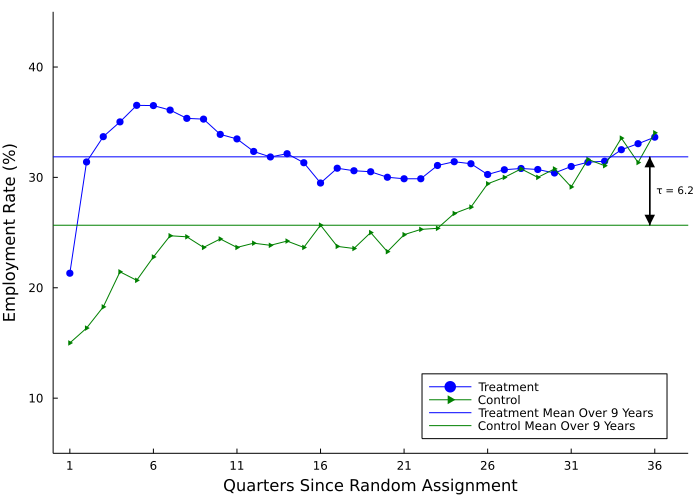

In [ ]:
data = copy(dat)
df = groupby(data, "treatment")
df = combine(df, names(data[!,4:size(data)[2]]) .=> mean)
names_df = names(df);
co_1_df = collect(values(df[1,2:length(names_df)]))*100; co_2_df = collect(values(df[2,2:length(names_df)]))*100
df = DataFrame(c = co_1_df, t  = co_2_df)
df[!,"x"] = 1:36
t_m = mean(df[!,"t"])
c_m = mean(df[!,"c"])
ef = string(round((t_m - c_m), digits = 3))
df = Matrix(df);

plot(df[1:size(df)[1],[2,1]], 
        label =  ["Treatment" "Control"], 
        shape = [:circle :rtriangle], 
        color = [:blue :green],
        markerstrokecolor = [:blue :green],
        foreground_color_grid = :white,
        ylabel = "Employment Rate (%)",
        xlabel = x_lbl,
        xlims = (0,38),
        xtick = 1:5:37,
        ylims = (5,45),
        ytick = 10:10:41,
        background_color = :white, size=(700,500))

hline!([t_m c_m], color = [:blue :green], label = ["Treatment Mean Over 9 Years" "Control Mean Over 9 Years"], legend = :bottomright)
annotate!([37.2], mean([t_m, c_m]),text"\tau = 6.2", 7)
plot!( [35.7, 35.7], [c_m, t_m], arrow = arrow(:closed), color = :black, label = "")
plot!( [35.7, 35.7], [t_m, c_m], arrow = arrow(:closed), color = :black, label = "")

# Figure 3: Estimates of Treatment Effect on Mean Employment Rates Over Nine Years


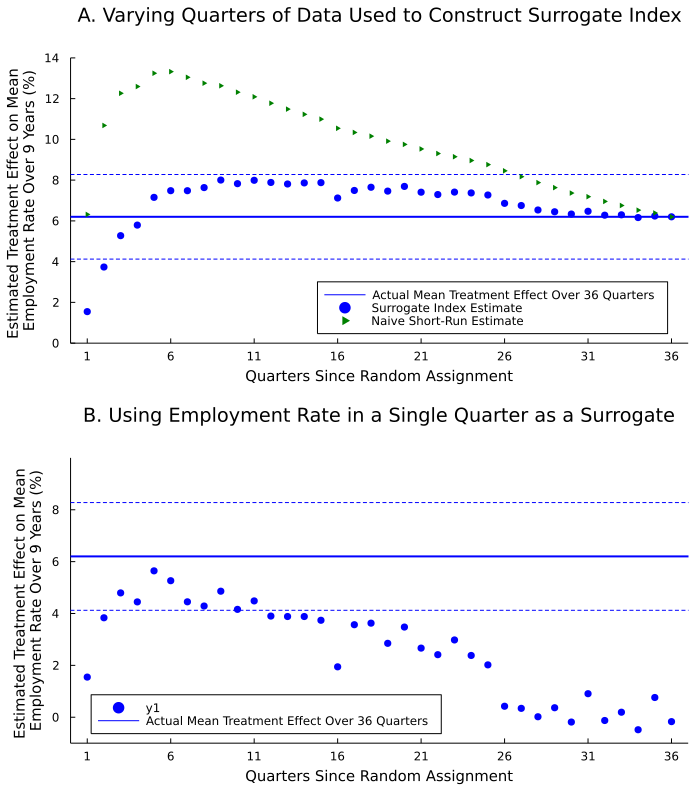

In [ ]:
sg = []; nv = []
for i in 1:36
        append!( sg, coef(surrogate_index[i])[2]*100)
        append!( nv, coef(y_reg2[i])[2]*100)
end
plot3_1 = plot(foreground_color_grid = :white, 
                title = "A. Varying Quarters of Data Used to Construct Surrogate Index\n", titlefontsize = 13,
                ylabelfontsize = 10, xlabelfontsize = 10,
                ylabel = "Estimated Treatment Effect on Mean \nEmployment Rate Over 9 Years (%)", xlabel = x_lbl,
                xlims = (0,37), xtick = 1:5:37, ylims = (0,14), ytick = 0:2:14,
                background_color = :white, size = (700,500))

hline!(plot3_1, [confint(exp_reg)[2,1]*100 confint(exp_reg)[2,2]*100 coef(exp_reg)[2]*100], 
                color = [:blue :blue :blue], line = [:dash :dash :solid], linewidth = [1 1 2],
                label = ["" "" "Actual Mean Treatment Effect Over 36 Quarters"], legend=:bottomright)
        
scatter!(plot3_1, [1:36 1:36], [sg nv],label = ["Surrogate Index Estimate" "Naive Short-Run Estimate"], 
                shape = [:circle :rtriangle], color = [:blue :green], markerstrokecolor = [:blue :green])

ex = []
for i in 1:36
    append!(ex, coef(naive_index[i])[2] * 100)
end
plot3_2 = plot(foreground_color_grid = :white, title = "B. Using Employment Rate in a Single Quarter as a Surrogate\n",
                ylabel = "Estimated Treatment Effect on Mean \nEmployment Rate Over 9 Years (%)", xlabel = x_lbl, 
                titlefontsize = 13, ylabelfontsize = 10, xlabelfontsize = 10,
                xlims = (0,37), xtick = 1:5:37, ylims = (-1,10), ytick = 0:2:8,
                background_color = :white, size = (700,500))

scatter!(plot3_2, ex, color = :blue, markerstrokecolor = :blue)

hline!(plot3_2, [confint(exp_reg)[2,1]*100 confint(exp_reg)[2,2]*100 coef(exp_reg)[2]*100], 
                color = [:blue :blue :blue], line = [:dash :dash :solid], linewidth = [1 1 2],
                label = ["" "" "Actual Mean Treatment Effect Over 36 Quarters"], legend=:bottomleft)

plot(plot3_1, plot3_2, layout = (2,1), size = (700, 800))

### Figure 4 : Validation of Six-Quarter Surrogate Index: Estimates of Treatment Effects on Mean Employment Rates, Varying Outcome Horizon

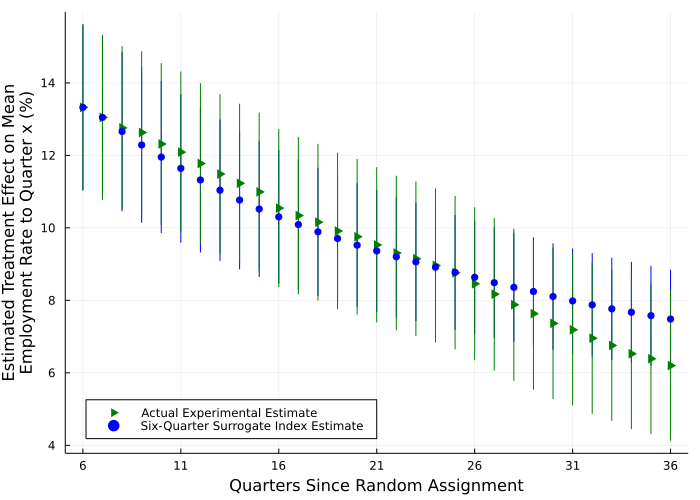

In [ ]:
data = copy(dat);

for i in 1:36 
    data[!,"emp_cm1"] = data[!,"emp1"]
    if i >1
        data[!,"emp_cm" * string(i)] = data[!,"emp"* string(i)] + data[!,"emp_cm"* string(i-1)]
    end
end
for i in 1:36
    data[!,"emp_cm" * string(i)] = data[!,"emp_cm" * string(i)] / i
end

data_1 = filter(row -> row.treatment == 1, data)

surr_4 = [1:1:5;]; surr_4_ix = [1:1:5]; exp_4 = [1:1:5;]
for i in 6:36
    surr_4 = vcat(surr_4, lm(emp_eq(6, "emp_cm" * string(i)), data_1))
    data[!,"surr_4"] = predict(surr_4[i], data)
    surr_4[i] = lm(@formula(surr_4 ~ treatment), data)

    exp_4 = vcat(exp_4, lm(emp_eq2(i, "treatment","emp_cm"), data))
end

sr = [1:5;]; sr_ci = [1:5;]; exp = [1:5;]; exp_ci = [1:5;]; xs = [1:5;]

for i in 6:36
    sr = vcat(sr, coef(surr_4[i])[2]*100)
    sr_ci = vcat(sr_ci, [[confint(surr_4[i])[2,1:2]*100]])
    
    exp = vcat(exp, coef(exp_4[i])[2]*100)
    exp_ci = vcat(exp_ci, [confint(exp_4[i])[2,1:2]*100])
    
    xs = vcat(xs, [[[i,i]]])
end

plot(xtick = 6:5:37, ytick = 4:2:15, size = (700, 500),
        xlabel = x_lbl, ylabel = "Estimated Treatment Effect on Mean\nEmployment Rate to Quarter x (%)")
plot!(xs[6:36], sr_ci[6:36], line = :solid, label = "", color = :blue)
        #xtick = 6:5:37, ytick = 4:2:15, size = (800, 600))
plot!(xs[6:36], exp_ci[6:36], line = :solid, label = "", color = :green)
scatter!(6:36, exp[6:36], label = "Actual Experimental Estimate", 
        color = :green, markerstrokecolor = :green, shape = :rtriangle, markersize	= 7)
scatter!(6:36, sr[6:36], label = "Six-Quarter Surrogate Index Estimate", 
        color = :blue, markerstrokecolor = :blue, shape = :circle, legend = :bottomleft)

### Figure 5: Bounds on Mean Treatment Effect on Employment Rates Over Nine Years, Varying Number of Quarters Used to Construct Surrogate Index

In [ ]:
### Bias
va_r = 0.09500865

bias_01_emp_ar = []
bias_05_emp_ar = []

for i in 1:36
    r2_t = r2(y_reg[i])
    r2_o = r2(bias[i])
    bias_01_emp = (va_r * 0.01 * (1 - r2_t) * (1 - r2_o) / va_r) ^ (1 / 2) * 100
    bias_05_emp = (va_r * 0.05 * (1 - r2_t) * (1 - r2_o) / va_r) ^ (1 / 2) * 100
    bias_01_emp_ar = vcat(bias_01_emp_ar, bias_01_emp)
    bias_05_emp_ar = vcat(bias_05_emp_ar, bias_05_emp)
end

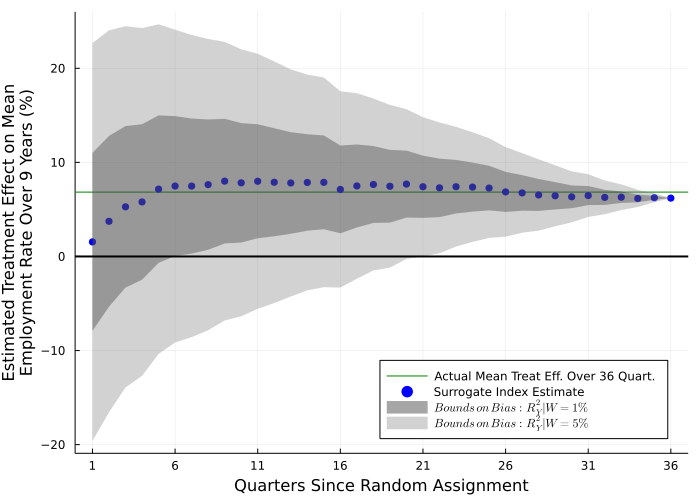

In [ ]:
s_inx = []
for i in 1: 36
    sg = coef(surrogate_index[i])[2]*100
    s_inx = vcat(s_inx, sg)
end

u1 = s_inx + bias_01_emp_ar
l1 = s_inx - bias_01_emp_ar
u5 = s_inx + bias_05_emp_ar
l5 = s_inx - bias_05_emp_ar
x_q = 1:36;

plot(xtick = 1:5:37, size =(700,500),
        xlabel = x_lbl, ylabel = "Estimated Treatment Effect on Mean\nEmployment Rate Over 9 Years (%)")
hline!([mean(s_inx)], label = "Actual Mean Treat Eff. Over 36 Quart.", color = :green)
scatter!(x_q, s_inx, label = "Surrogate Index Estimate", color = :blue, markerstrokecolor = :blue)

plot!(x_q, u1, label = L"Bounds\, on\, Bias: R^2_Y|W = 1\%", color = false,
        fillrange= l1, fillalpha=0.35, fillcolor = :black)

plot!(x_q, u5, label = L"Bounds\, on\, Bias: R^2_Y|W = 5\%", color = false,
        fillrange= l5, fillalpha=0.35, fillcolor = :gray, legend = :bottomright)

hline!([0], label = "", color = :black, line = 2)